# Wildfire Smoke Advection

We consider the problem of wildfire smoke, originating in Southern california, advecting Eastwards in the upper troposphere. We would like to simulate the evolution of smoke concentration over the Southern US (a 1D transect from the West to the East coast), and track the modeled smoke concentration in Atlanta. The advection equation in the absence of a source or sink, is: $$\frac{\partial J}{\partial t} + u \frac{\partial J}{\partial x} = 0$$

and we consider the boundary condition: $$ J(x=0,t)=0$$ 
which implies that no smoke comes in at the Western edge of the domain (i.e. from the Pacific Ocean). The initial condition is a uniform concentration of smoke over a narrow region:

$ J(t=0,x) = 1$ for $10<x<100$ km

$ J(t=0,x) = 0$ elsewhere


In [1]:
#lets import some packages
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Set parameters

In [74]:
u = 0.05
xf = 3000
tf = 86400

m = 301
n = int(tf/200)

dx = xf/(m-1)
dt = 200

C = u*dt/dx

## Pre-allocate vectors

In [67]:
J = np.zeros([m,1])
Jall = np.zeros([m,n])

x = np.linspace(0,xf,m)
ts = np.linspace(0,tf,n)

## Create advection evolution matrix (inc BCs)

In [68]:
from scipy.sparse import dia_matrix
M = dia_matrix((m, m), dtype=np.double).toarray()
for i in np.arange(0,m):
    for j in np.arange(0,m):
        if i==j:
            M[i,j] = 1-C
        elif i-1==j:
            M[i,j] = C

## Initial condition

In [69]:
xidx = (x>=10) & (x<=100) 
J[xidx] = 1
Jall[:,0] = J.transpose()

## Run model loop!

In [70]:
for t in np.arange(0,n):
    Jnew = np.matmul(M,J)
    
    Jall[:,t] = Jnew.transpose()
    J = Jnew

## Plot stuff

In [64]:
plt.plot(ts/3600,Jall[250,:])

IndexError: index 250 is out of bounds for axis 0 with size 201

Text(0, 0.5, 'distance east (km)')

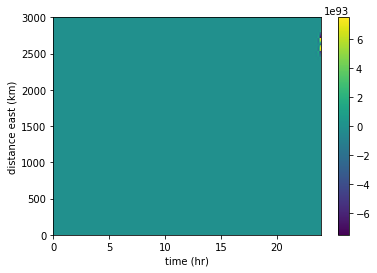

In [73]:
plt.pcolor(ts/3600,x,Jall)
plt.colorbar()
plt.xlabel('time (hr)')
plt.ylabel('distance east (km)')